In [ ]:
import warnings
import numpy as np 
import pandas as pd  
import seaborn as sns  
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error 
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('data.csv',encoding='gbk') #import the dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
df.shape 

(8760, 14)

In [6]:
df.isnull().sum()  

Date                       0
Rented Bike Count          0
Hour                       0
Temperature                0
Humidity(%)                0
Wind speed (m/s)           0
Visibility (10m)           0
Dew point temperature      0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
Seasons                    0
Holiday                    0
Functioning Day            0
dtype: int64

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     8760 non-null   object 
 1   Rented Bike Count        8760 non-null   int64  
 2   Hour                     8760 non-null   int64  
 3   Temperature              8760 non-null   float64
 4   Humidity(%)              8760 non-null   int64  
 5   Wind speed (m/s)         8760 non-null   float64
 6   Visibility (10m)         8760 non-null   int64  
 7   Dew point temperature    8760 non-null   float64
 8   Solar Radiation (MJ/m2)  8760 non-null   float64
 9   Rainfall(mm)             8760 non-null   float64
 10  Snowfall (cm)            8760 non-null   float64
 11  Seasons                  8760 non-null   object 
 12  Holiday                  8760 non-null   object 
 13  Functioning Day          8760 non-null   object 
dtypes: float64(6), int64(4),

In [8]:
def get_numeric_and_nominal_attributes(df): 
    num_attribute = len(df.columns)  
    nominal_attributes=[]
    numeric_attributes=[]
    for i in range(num_attribute): 
        if(df.dtypes[i] in ["int64",'float64']): 
            numeric_attributes.append(df.columns[i])
        else:
            nominal_attributes.append(df.columns[i])
    return numeric_attributes, nominal_attributes

In [9]:
numeric_attributes, nominal_attributes=get_numeric_and_nominal_attributes(df)

In [10]:
len(numeric_attributes) 

10

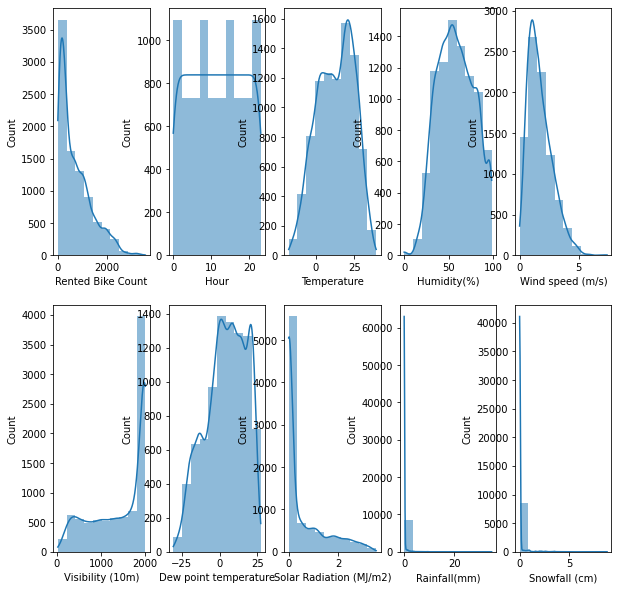

In [11]:
fig, axes = plt.subplots(2, 5, figsize=(10, 10))
row=0
col=0
mean_group=numeric_attributes
for i in range(len(mean_group)):
    if col<5:
        sns.histplot(data=df, x=mean_group[i], bins=10, kde=True, ax=axes[row,col], edgecolor=None)
    else:
        row+=1
        col=0
        sns.histplot(data=df, x=mean_group[i], bins=10, kde=True, ax=axes[row,col], edgecolor=None)
    col+=1

In [12]:
df1=df.groupby(by="Seasons").mean()  
df1

,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Seasons,,,,,,,,,,
Autumn,819.597985,11.5,14.120833,59.228480,1.494734,1560.752289,5.498718,0.521818,0.122756,0.056319
Spring,730.031250,11.5,13.046694,58.776721,1.874592,1240.364583,4.120063,0.688786,0.182880,0.000000
Summer,1034.073370,11.5,26.582790,64.981431,1.609420,1501.745471,18.750136,0.761255,0.253487,0.000000
Winter,225.541204,11.5,-2.540463,49.744907,1.922685,1445.987037,-12.416667,0.298181,0.032824,0.247500


Text(0, 0.5, 'Rented Bike Count')

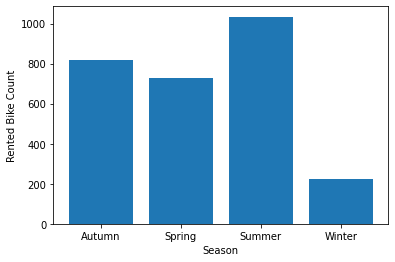

In [13]:
x=df1.index 
y=[df1['Rented Bike Count'][0],df1['Rented Bike Count'][1],df1['Rented Bike Count'][2],df1['Rented Bike Count'][3]] #获取柱坐标数值
plt.bar(x,y) 
plt.xlabel('Season')
plt.ylabel('Rented Bike Count')  

In [14]:
df1=df.groupby(by="Holiday").mean() 
df1

,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Holiday,,,,,,,,,,
Holiday,499.756944,11.5,9.949769,53.731481,1.829630,1521.680556,0.245833,0.549745,0.078009,0.050926
No Holiday,715.228026,11.5,13.035074,58.459414,1.719476,1432.424111,4.272382,0.570115,0.152354,0.076321


Text(0, 0.5, 'Rented Bike Count')

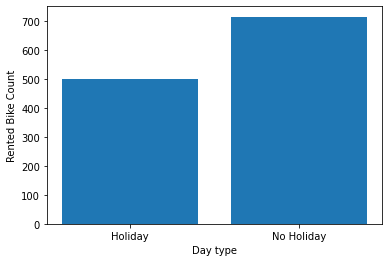

In [15]:
x=df1.index
y=[df1['Rented Bike Count'][0],df1['Rented Bike Count'][1]] 
plt.bar(x,y)
plt.xlabel('Day type')
plt.ylabel('Rented Bike Count')

In [16]:
df1=df.groupby(by="Functioning Day").mean() 
df1

,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Functioning Day,,,,,,,,,,
No,0.000000,11.298305,16.092881,60.494915,1.696949,1521.542373,7.770169,0.604780,0.136271,0.000000
Yes,729.156999,11.507029,12.771057,58.147194,1.725883,1433.873479,3.944997,0.567868,0.149120,0.077685


Text(0, 0.5, 'Rented Bike Count')

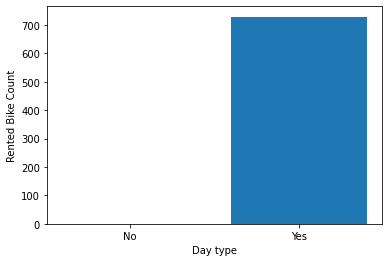

In [17]:
x=df1.index
y=[df1['Rented Bike Count'][0],df1['Rented Bike Count'][1]] 
plt.bar(x,y)
plt.xlabel('Day type')
plt.ylabel('Rented Bike Count')

In [18]:
column=['Seasons','Holiday','Functioning Day']  
df_dummy=pd.get_dummies(df,columns=column, prefix=column,prefix_sep="_") 
df_dummy=df_dummy.drop('Date',axis=1)
df_dummy

,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,0,0,0,0,1,0,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,0,0,0,0,1,0,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,0,0,0,0,1,0,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,0,0,0,0,1,0,1


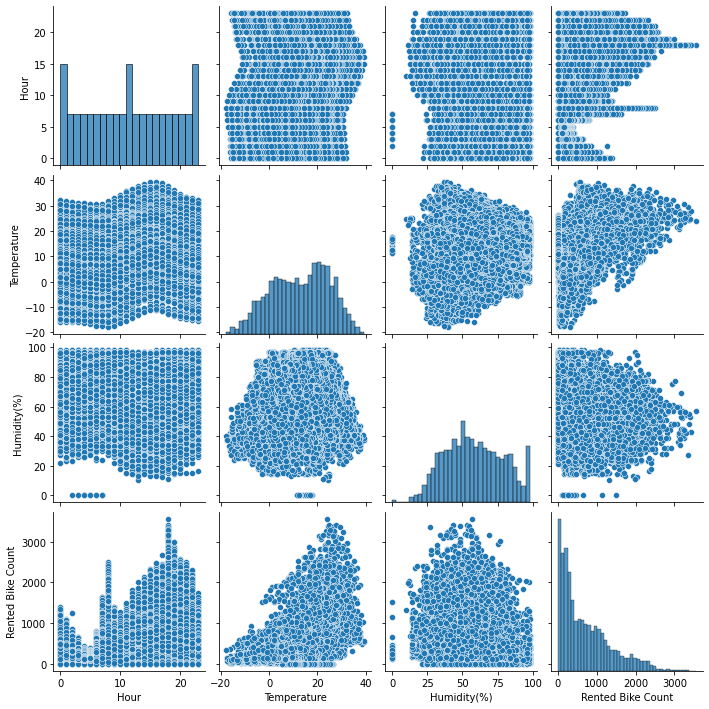

In [42]:
var=['Hour','Temperature','Humidity(%)','Rented Bike Count']
sns.pairplot(df_dummy,vars=var)

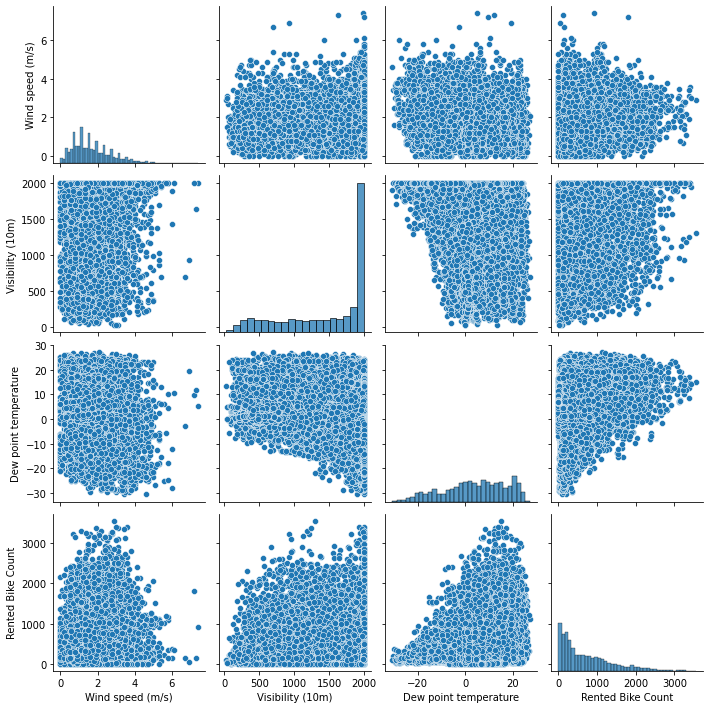

In [43]:
var=['Wind speed (m/s)','Visibility (10m)','Dew point temperature','Rented Bike Count']
sns.pairplot(df_dummy,vars=var)

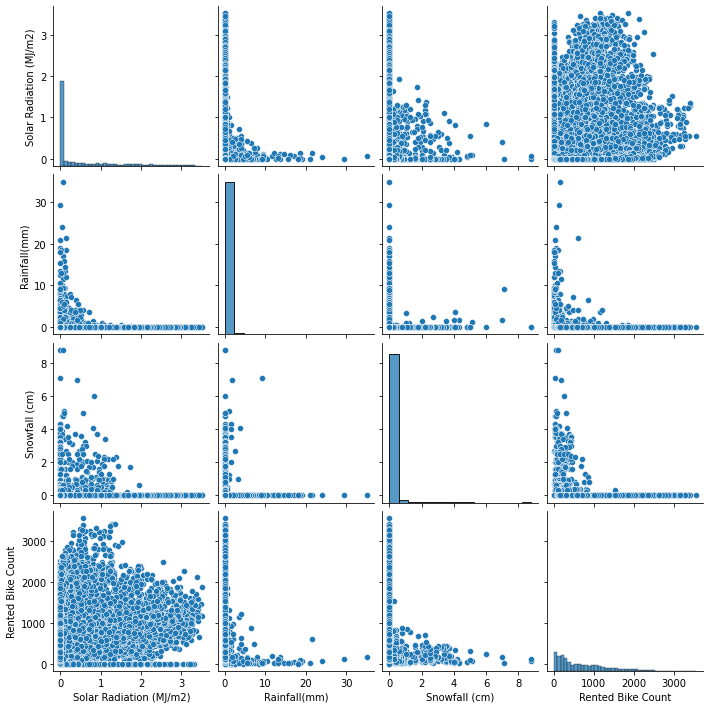

In [50]:
var=['Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Rented Bike Count']
sns.pairplot(df_dummy,vars=var)

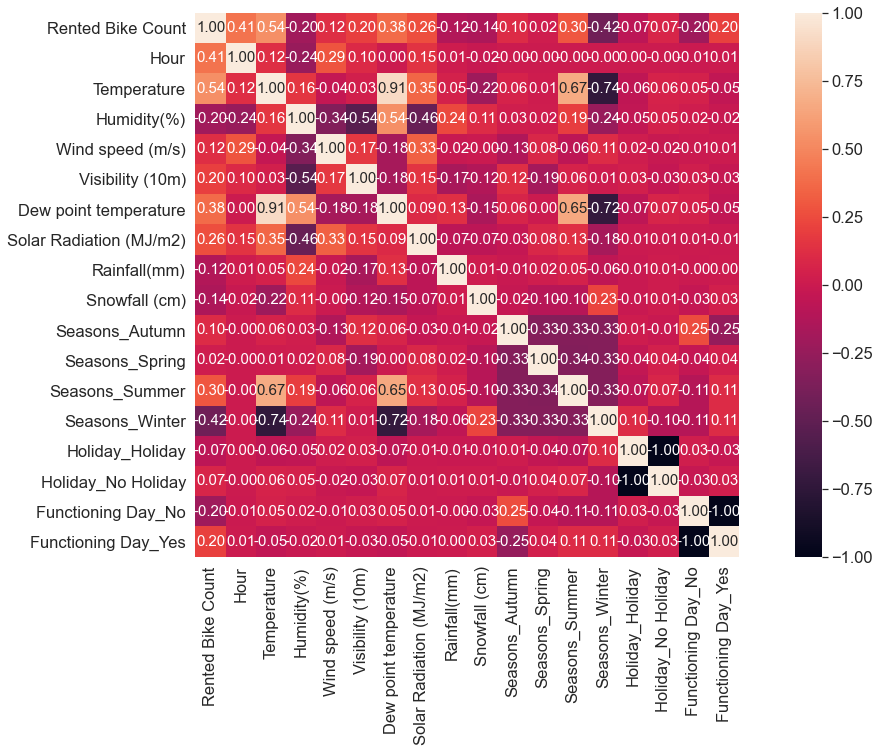

In [53]:
#Draw the distribution diagram of cocorrelation matrix
plt.figure(figsize=(20, 10))
cm = np.corrcoef(df_dummy.values.T) #Calculate cocorrelation coefficients
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size':15},
                 yticklabels=df_dummy.columns,
                 xticklabels=df_dummy.columns)


In [24]:
numeric_attributes.remove('Rented Bike Count')
numeric_attributes

['Hour',
 'Temperature',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [27]:
df2=df_dummy.copy()
df2[numeric_attributes] = StandardScaler().fit_transform(np.array(df2[numeric_attributes]))  #连续变量归一化
df2

,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,254,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,0,0,0,1,0,1,0,1
1,204,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,0,0,0,1,0,1,0,1
2,173,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,0,0,0,1,0,1,0,1
3,107,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,0,0,0,1,0,1,0,1
4,78,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,1.083473,-0.726961,-1.189822,0.844486,0.751605,-1.100630,-0.655132,-0.1318,-0.171891,1,0,0,0,0,1,0,1
8756,764,1.227936,-0.793939,-1.042483,0.554978,0.925871,-1.070001,-0.655132,-0.1318,-0.171891,1,0,0,0,0,1,0,1
8757,694,1.372399,-0.860918,-0.944257,-1.375075,0.873263,-1.070001,-0.655132,-0.1318,-0.171891,1,0,0,0,0,1,0,1
8758,712,1.516862,-0.902779,-0.846031,-0.699556,0.694064,-1.062344,-0.655132,-0.1318,-0.171891,1,0,0,0,0,1,0,1


In [28]:
x=df2.drop('Rented Bike Count',axis=1)  
y=df2['Rented Bike Count'] 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=81) 

In [ ]:
#baseline model

Test error: 399813.880
Test RMSE: 632.308
Test R^2 : -0.000


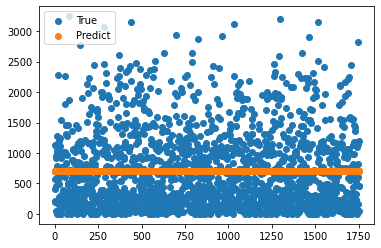

In [38]:
dict1={'mse':[],'rmse':[],'r2 score':[]} #dirctionary
model=DummyRegressor(strategy='mean') #baseline model
model.fit(x_train,y_train) #train
y_pred=model.predict(x_test)  #predict 
mse=mean_squared_error(y_test, y_pred) #mse
rmse=np.sqrt(mean_squared_error(y_test, y_pred)) #rmse
r2=r2_score(y_test, y_pred) #r2 range 0-1, larger, better
dict1['mse'].append(mse)
dict1['rmse'].append(rmse)
dict1['r2 score'].append(r2)  #output
print(f"Test error: {mean_squared_error(y_test, y_pred):4.3f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):4.3f}")
print(f"Test R^2 : {r2_score(y_test, y_pred):4.3f}")
plt.scatter(range(len(y_test)),y_test,label='True')  #real VS predict 
plt.scatter(range(len(y_test)),y_pred,label='Predict')
plt.legend()
plt.show()

In [1]:
#Linear regression

Test error: 182000.130
Test RMSE: 426.615
Test R^2 : 0.545


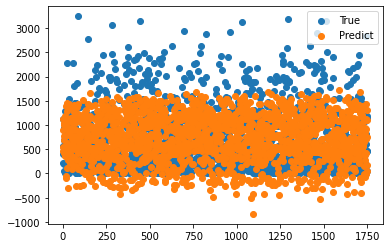

In [39]:
model=linear_model.LinearRegression() 
model.fit(x_train,y_train) #train
y_pred=model.predict(x_test)  #predict
mse=mean_squared_error(y_test, y_pred) 
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
r2=r2_score(y_test, y_pred)
dict1['mse'].append(mse)
dict1['rmse'].append(rmse)
dict1['r2 score'].append(r2)
print(f"Test error: {mean_squared_error(y_test, y_pred):4.3f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):4.3f}")

print(f"Test R^2 : {r2_score(y_test, y_pred):4.3f}")
plt.scatter(range(len(y_test)),y_test,label='True')
plt.scatter(range(len(y_test)),y_pred,label='Predict')
plt.legend()
plt.show()

In [ ]:
#decision tree

Test error: 102564.564
Test RMSE: 320.257
Test R^2 : 0.743


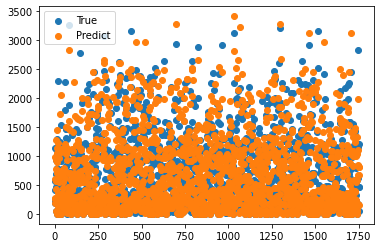

In [40]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
r2=r2_score(y_test, y_pred)
dict1['mse'].append(mse)
dict1['rmse'].append(rmse)
dict1['r2 score'].append(r2)
print(f"Test error: {mean_squared_error(y_test, y_pred):4.3f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):4.3f}")

print(f"Test R^2 : {r2_score(y_test, y_pred):4.3f}")
plt.scatter(range(len(y_test)),y_test,label='True')
plt.scatter(range(len(y_test)),y_pred,label='Predict')
plt.legend()
plt.show()

In [ ]:
#random forest

Test error: 54089.029
Test RMSE: 232.570
Test R^2 : 0.865


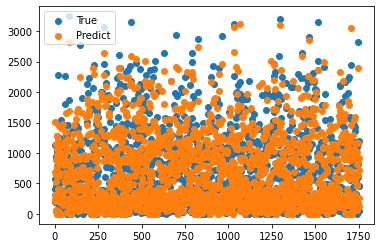

In [41]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
r2=r2_score(y_test, y_pred)
dict1['mse'].append(mse)
dict1['rmse'].append(rmse)
dict1['r2 score'].append(r2)
print(f"Test error: {mean_squared_error(y_test, y_pred):4.3f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):4.3f}")

print(f"Test R^2 : {r2_score(y_test, y_pred):4.3f}")
plt.scatter(range(len(y_test)),y_test,label='True')
plt.scatter(range(len(y_test)),y_pred,label='Predict')
plt.legend()
plt.show()

In [ ]:
#summary 

In [42]:
dict1['model']=['baseline','linear model','decision tree','random forest']
result=pd.DataFrame(dict1,columns=['mse','rmse','r2 score'])
result.index=['baseline','linear model','decision tree','random forest']
result

,mse,rmse,r2 score
baseline,399813.880495,632.308375,-0.000100
linear model,182000.130137,426.614733,0.544742
decision tree,102564.563927,320.257028,0.743444
random forest,54089.029416,232.570483,0.864701


In [ ]:
#hyperparameter of decision tree model

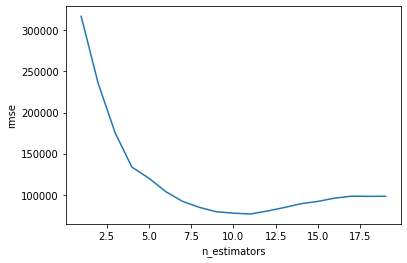

In [52]:
max_depth=range(1,20,1) #1-20 step 1
rmse=[]
for i in max_depth:
    model=DecisionTreeRegressor(max_depth=i) 
    scores = cross_val_score(model, x_train, y_train, cv=5,scoring='neg_mean_squared_error') 
    rmse.append(abs(scores.mean()))
plt.plot(max_depth,rmse)  
plt.xlabel('n_estimators')
plt.ylabel('rmse')
plt.show()

In [53]:
#hyperparameter of random forest 

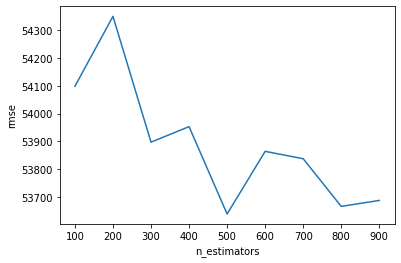

In [54]:
estimators=range(100,1000,100)
rmse=[]
for i in estimaors:
    model=RandomForestRegressor(n_estimators=i)
    scores = cross_val_score(model, x_train, y_train, cv=5,scoring='neg_mean_squared_error')
    rmse.append(abs(scores.mean()))
plt.plot(estimators,rmse)
plt.xlabel('n_estimators')
plt.ylabel('rmse')
plt.show()